# 1. Data Pre-processing

### 1.1 Checking the dataset

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

The first thing we need to do is to load the dataset and checking the data type of each features.

In [2]:
df = pd.read_csv('CPU_benchmark.csv')
df

,cpuName,price,cpuMark,cpuValue,threadMark,threadValue,TDP,powerPerf,cores,testDate,socket,category
0,AMD Ryzen Threadripper PRO 5995WX,NaN,108822,NaN,3330,NaN,280.0,388.65,64,2022,sWRX8,Desktop
1,AMD EPYC 7763,7299.99,88338,12.10,2635,0.36,280.0,315.49,64,2021,SP3,Server
2,AMD EPYC 7J13,NaN,86006,NaN,2387,NaN,NaN,NaN,64,2021,unknown,Server
3,AMD EPYC 7713,7060.00,85861,12.16,2727,0.39,225.0,381.6,64,2021,SP3,Server
4,AMD Ryzen Threadripper PRO 3995WX,6807.98,83971,12.33,2626,0.39,280.0,299.9,64,2020,sWRX8,Desktop
...,...,...,...,...,...,...,...,...,...,...,...,...
3820,Intel Pentium 4 1.60GHz,NaN,84,NaN,225,NaN,38.0,2.22,1,2009,PGA478,Desktop
3821,Intel Pentium 4 1400MHz,NaN,83,NaN,180,NaN,54.7,1.52,1,2009,PGA423,Desktop
3822,Intel Pentium 4 1500MHz,NaN,81,NaN,223,NaN,57.8,1.41,1,2009,PGA423,Desktop
3823,VIA Eden 1000MHz,NaN,80,NaN,83,NaN,5.0,16.08,1,2017,NanoBGA2,Laptop


From the header and footer of above dataset, we could find that there are some different null values in different features. There are some 'NaN' values in almost every features and some 'unknown' strings in 'socket' variable. Now we should do some checking.

In [3]:
cols = df.columns
print(cols)
for col in cols:
    print(col+' : '+str(type(df[col][0])))

Index(['cpuName', 'price', 'cpuMark', 'cpuValue', 'threadMark', 'threadValue',
       'TDP', 'powerPerf', 'cores', 'testDate', 'socket', 'category'],
      dtype='object')
cpuName : <class 'str'>
price : <class 'numpy.float64'>
cpuMark : <class 'numpy.int64'>
cpuValue : <class 'numpy.float64'>
threadMark : <class 'numpy.int64'>
threadValue : <class 'numpy.float64'>
TDP : <class 'numpy.float64'>
powerPerf : <class 'str'>
cores : <class 'numpy.int64'>
testDate : <class 'numpy.int64'>
socket : <class 'str'>
category : <class 'str'>


It seems that the 'powerPerf' should be a numerical feature, but the value is stored in string type, so the next thing we need to do is transform the data type of the 'powerPerf' variable from 'str' to 'float64'.

In [6]:
for i in df.index:
    if isinstance(df.loc[i, 'powerPerf'], str):
        slice = df.loc[i, 'powerPerf'].split(",")
        df.loc[i, 'powerPerf'] = ''.join(slice)

df.powerPerf = df.powerPerf.astype('float64')
print(str(type(df['powerPerf'][0])))

<class 'numpy.float64'>


In the processing of this 'powerPerf' feautre, I noticed that there are two data type in this variable, which is float64 and string. Some data are over a thousand, so they need to be separated by commas, and somehow these data was treated as string while the other values smaller than 1,000 are treated as float64 type.

After completing the transform, we need to check the situation of the missing values.

In [7]:
df.isna().sum()

cpuName           0
price          1858
cpuMark           0
cpuValue       1858
threadMark        0
threadValue    1858
TDP             685
powerPerf       685
cores             0
testDate          0
socket            0
category          0
dtype: int64

The total amount of the dataset is 3825, and from the result we could see that the number of missing values accounted for nearly 50% of the whole dataset, which means ignoring these missing values is the worst thing to do. Here, I will use the mean value to do the data imputation. The reason that mean value is used to do the imputation here is that 'price', 'cpuValue', 'ThreadValue', 'TDP', 'powerPerf' are all numeric variables.

In [11]:
df[df.loc[:, ['price', 'cpuValue', 'threadValue']].isna().T.any()]

,cpuName,price,cpuMark,cpuValue,threadMark,threadValue,TDP,powerPerf,cores,testDate,socket,category
0,AMD Ryzen Threadripper PRO 5995WX,NaN,108822,NaN,3330,NaN,280.0,388.65,64,2022,sWRX8,Desktop
2,AMD EPYC 7J13,NaN,86006,NaN,2387,NaN,NaN,NaN,64,2021,unknown,Server
6,AMD Ryzen Threadripper PRO 5975WX,NaN,80842,NaN,3340,NaN,280.0,288.72,32,2022,sWRX8,Desktop
7,AMD EPYC 7B13,NaN,77460,NaN,2564,NaN,NaN,NaN,60,2021,unknown,Server
12,AMD EPYC 75F3,NaN,68505,NaN,2775,NaN,280.0,244.66,32,2021,SP3,Server
...,...,...,...,...,...,...,...,...,...,...,...,...
3820,Intel Pentium 4 1.60GHz,NaN,84,NaN,225,NaN,38.0,2.22,1,2009,PGA478,Desktop
3821,Intel Pentium 4 1400MHz,NaN,83,NaN,180,NaN,54.7,1.52,1,2009,PGA423,Desktop
3822,Intel Pentium 4 1500MHz,NaN,81,NaN,223,NaN,57.8,1.41,1,2009,PGA423,Desktop
3823,VIA Eden 1000MHz,NaN,80,NaN,83,NaN,5.0,16.08,1,2017,NanoBGA2,Laptop


In [12]:
df[df.loc[:, ['TDP', 'powerPerf']].isna().T.any()]

,cpuName,price,cpuMark,cpuValue,threadMark,threadValue,TDP,powerPerf,cores,testDate,socket,category
2,AMD EPYC 7J13,NaN,86006,NaN,2387,NaN,NaN,NaN,64,2021,unknown,Server
7,AMD EPYC 7B13,NaN,77460,NaN,2564,NaN,NaN,NaN,60,2021,unknown,Server
16,AMD EPYC 7R32,NaN,64727,NaN,1922,NaN,NaN,NaN,48,2020,unknown,Server
57,Intel Xeon Platinum 8275CL @ 3.00GHz,NaN,40794,NaN,2386,NaN,NaN,NaN,24,2019,unknown,Server
68,ARM Neoverse-N1 80 Core 3000 MHz,NaN,38122,NaN,1329,NaN,NaN,NaN,80,2021,unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
3810,Intel Celeron 1.70GHz,NaN,101,NaN,190,NaN,NaN,NaN,1,2009,unknown,Unknown
3811,VIA Nehemiah,NaN,101,NaN,75,NaN,NaN,NaN,1,2011,unknown,Unknown
3813,Intel Pentium III Mobile 866MHz,NaN,99,NaN,132,NaN,NaN,NaN,1,2009,unknown,Laptop
3815,VIA Esther 1000MHz,NaN,95,NaN,82,NaN,NaN,NaN,1,2011,unknown,Unknown


The results above are just double checking if the null value is in the same column and from the results the answer is yes. Now we could do the imputation.

In [15]:
price_mean = np.mean(df.price)
null_col = df[df['price'].isna()].index
df.loc[null_col, 'price'] = price_mean

cpuV_mean = np.mean(df.cpuValue)
null_col = df[df['cpuValue'].isna()].index
df.loc[null_col, 'cpuValue'] = cpuV_mean

threadV_mean = np.mean(df.threadValue)
null_col = df[df['threadValue'].isna()].index
df.loc[null_col, 'threadValue'] = threadV_mean

TDP_mean = np.mean(df.TDP)
null_col = df[df['TDP'].isna()].index
df.loc[null_col, 'TDP'] = TDP_mean

power_mean = np.mean(df.powerPerf)
null_col = df[df['powerPerf'].isna()].index
df.loc[null_col, 'powerPerf'] = power_mean

Now let us check the numeric null values again.

In [16]:
df.isna().sum()

cpuName        0
price          0
cpuMark        0
cpuValue       0
threadMark     0
threadValue    0
TDP            0
powerPerf      0
cores          0
testDate       0
socket         0
category       0
dtype: int64

We could find that there is no any numerical null values now. However, I noticed that there are also some 'unknown' and 'Unknown' values in 'socket' and 'category' variables, so let's check the number of it.

In [20]:
df.loc[:, 'category'].value_counts()

Laptop                              1147
Desktop                             1141
Server                               784
Mobile/Embedded                      425
Unknown                              260
Laptop, Mobile/Embedded               29
Desktop, Laptop                       12
Laptop, Server                        11
Desktop, Server                        7
Desktop, Mobile/Embedded               5
Server, Mobile/Embedded                3
Desktop, Laptop, Mobile/Embedded       1
Name: category, dtype: int64

In category variables, the number of the 'Unknown' value is not very large, so I just simply replace these 'Unknown' values with the 'Laptop' value, which occurs the most in the dataset.

In [22]:
df.loc[:, 'category'].replace('Unknown', 'Laptop', inplace=True)
df.loc[:, 'category'].value_counts()

Laptop                              1407
Desktop                             1141
Server                               784
Mobile/Embedded                      425
Laptop, Mobile/Embedded               29
Desktop, Laptop                       12
Laptop, Server                        11
Desktop, Server                        7
Desktop, Mobile/Embedded               5
Server, Mobile/Embedded                3
Desktop, Laptop, Mobile/Embedded       1
Name: category, dtype: int64

In [21]:
df.loc[:, 'socket'].value_counts()

unknown      788
AM4          133
LGA1155      103
FCLGA1200     97
LGA775        89
            ... 
AM2,AM2+       1
FCBGA2227      1
FS1 uPGA       1
LGA2011-1      1
FT5            1
Name: socket, Length: 203, dtype: int64

In the 'socket' variable, we can see that the number of 'unknown' value already far exceeds the amount of other data, so it's a corrupted data to some extend. Thus, I plan not to use this column and just throw it away.

In [23]:
df.drop(['socket'], axis=1, inplace=True)

So far, the data preprocessing work has been completed. Next, we need to clarify the question we want to explore.

### 1.2 Defining the task

In these variables, the price always gets the most attention. Thus, I want to use CUP's performance parameters to predict expected price. This means that the linear regression model and polynomial linear regression model is suitable for this question because we want to get a numeric result from a serise numeric input dataset.

The first thing I need to do is to clarify the input dataset and the output. Obviously, the output here is the 'price' variable, and the input dataset should be the performance parameters including 'cpuMark', 'cpuValue', 'threadMark', 'threadValue', 'TDP', 'powerPerf' and 'cores'.

The second thing I want to explore is to use the performance parameters to predict what category the CPU is and I plan to use MLP to do the classification and do some experiments about the hyperparameters.

In [27]:
x = df.iloc[:, [2, 3, 4, 5, 6, 7, 8]]
y = df.loc[:, 'price']

In [28]:
x

,cpuMark,cpuValue,threadMark,threadValue,TDP,powerPerf,cores
0,108822,35.354911,3330,15.189009,280.000000,388.650000,64
1,88338,12.100000,2635,0.360000,280.000000,315.490000,64
2,86006,35.354911,2387,15.189009,62.375557,121.623239,64
3,85861,12.160000,2727,0.390000,225.000000,381.600000,64
4,83971,12.330000,2626,0.390000,280.000000,299.900000,64
...,...,...,...,...,...,...,...
3820,84,35.354911,225,15.189009,38.000000,2.220000,1
3821,83,35.354911,180,15.189009,54.700000,1.520000,1
3822,81,35.354911,223,15.189009,57.800000,1.410000,1
3823,80,35.354911,83,15.189009,5.000000,16.080000,1


In [29]:
y

0        441.500946
1       7299.990000
2        441.500946
3       7060.000000
4       6807.980000
           ...     
3820     441.500946
3821     441.500946
3822     441.500946
3823     441.500946
3824     441.500946
Name: price, Length: 3825, dtype: float64

# 2. Data analysis

After getting the input and output dataset, the next thing we need to do is to check the correlation between the input dataset to choose the chracters.

<AxesSubplot:>

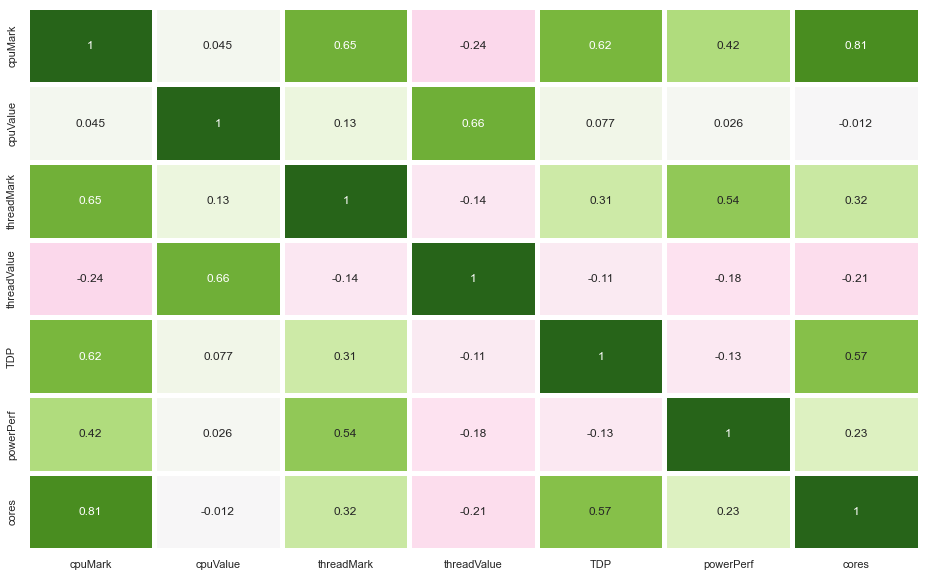

In [31]:
sns.set(rc = {'figure.figsize':(16, 10)})
sns.heatmap(x.corr(), annot = True, linewidths = 5, center = 0, cbar = False, cmap = 'PiYG')

Here, I define a threshold of 0.8 correlation coefficient to judge the pairs with high correlation. Those variables with high correlation need to be deleted because the size of the coherence of the initial data has a greater impact on the results, and it is likely to cause data redundancy. From the heatmap above we can observe that the correlation coefficient between 'cpuMark' and 'cores' is 0.81, which means there is a high correlation between these two variables. Thus I decide to delet the 'cores' term.

In [32]:
x.drop(['cores'], axis=1, inplace=True)

d:\Applications\Pyrhon37\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Sice we have two optional model here, we should use the train-validation-test patter to split the dataset by the proportion of 8:1:1. The training set is used to train each model. The validation set is used to choose the best performance in each model. Last the test set needs to be used to choose the best performanced model.

In [33]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.9, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=1)

### 2.1 Linear regression model

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lm = LinearRegression()
lm.fit(x_train, y_train)
y_predict = lm.predict(x_val)

# 评估模型
mse = mean_squared_error(y_val, y_predict)
print(mse)

290150.023344285


Here we got a MSE = 290150.023344285 by the validation set. Let's check the model's coefficient to see how much the variables affect the model.

In [46]:
print(lm.coef_)

[ 0.0427376  -5.08466897 -0.23737153 -0.98377836  2.30448101  0.27092785]


From the coefficients, we can find that the cpuValue has the biggest impact on the price. One unit increase on the cupValue, the final price will go down by 5.08466897.

### 2.2 Polynomial regression model

Let's test the performance of the polynomial regression model. Here I originally choose the degree from 2 to 9 to do some experiments.

In [42]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, explained_variance_score

mse = []
var = []

for i in range(2, 10):
    poly = PolynomialFeatures(degree=i)
    x_train_poly = poly.fit_transform(x_train)
    poly.fit(x_train_poly, y_train)

    plm = LinearRegression()
    plm.fit(x_train_poly, y_train)

    y_predict_poly = plm.predict(poly.fit_transform(x_val))

    mse.append(mean_squared_error(y_predict_poly, y_val))
    var.append(explained_variance_score(y_val, y_predict_poly))

Let's see how the models from order 2 to 9 perform on the validation set.

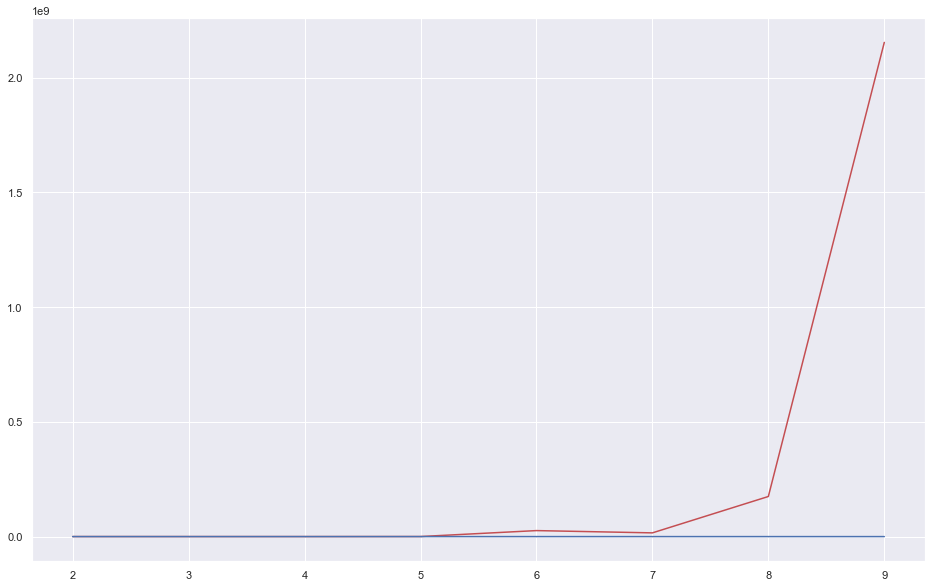

In [43]:
index = np.arange(2, 10, 1)
plt.plot(index, mse, 'r')
plt.plot(index, var, 'b')

From the result we could see that the MSE increase from dgree 6, which means that the model are becoming overfitting to the training set. So let's have a closer look at the degree from degree 2 to 6.

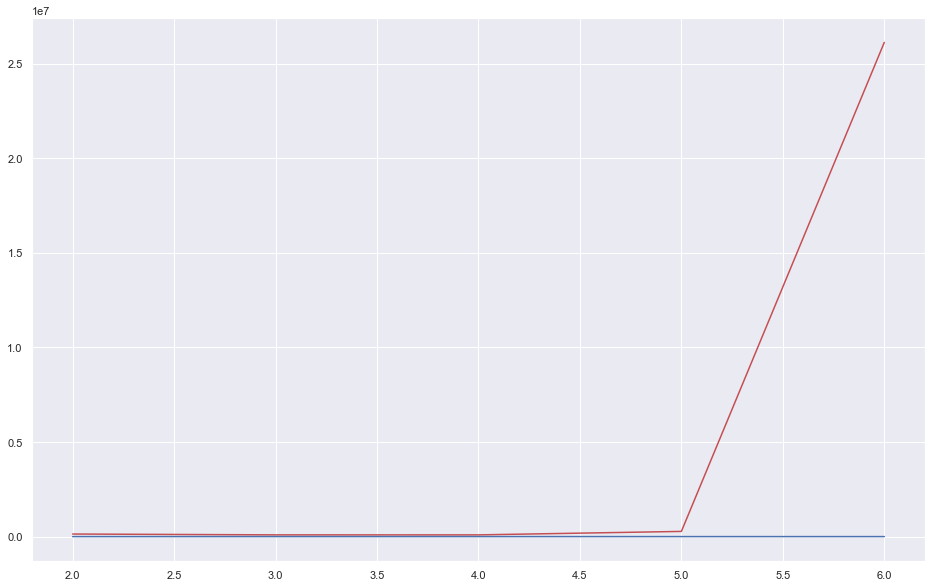

In [44]:
index = np.arange(2, 7, 1)
plt.plot(index, mse[0:5], 'r')
plt.plot(index, var[0:5], 'b')

From the plot above we can find that the MSE and the variance are close to zero, which means that the model has a good performance on predict the new data and has a nice generalize ability. Next, I need to print the MSE from degree 2 to 5 to choose the optimal order.

In [41]:
print(mse[0:5])

[135358.5965260682, 91259.27818220995, 90714.71532605976, 273761.08792816143, 26126547.871263046]


We could see that the MSE bottoms out at order 4, so the optimal choice should be at degree 4.

Now we should use the test set to compare between the linear regression model and the polynomial regression model.

In [47]:
lm_y_test_pre = lm.predict(x_test)
lm_mse = mean_squared_error(y_test, lm_y_test_pre)

plm_y_test_pre = plm.predict(poly.fit_transform(x_test))
plm_mse = mean_squared_error(y_test, plm_y_test_pre)

print("Linear Regression Model: " + str(lm_mse))
print("Polynomial Linear Regression Model: " + str(plm_mse))

Linear Regression Model: 416604.2694333722
Polynomial Linear Regression Model: 178231308031.47662


We could see that the Linear regression model performs much better on the test dataset than the polynomial linear regression model. So in conclusion, by using these dataset, the linear regression model can predict a better expected price.

### 2.3 Multilayer Linear Perceptron

We know from the previous results that the major category of the CPU is Laptop, Desttop, Server and Mobile/Embedded. The remaining CPU types can take into account two types of usage, but because the number is too small, I choose to ignore them here. And we need to reset the output data to the 'category'.

In [50]:
df.loc[:, 'category'].value_counts()

Laptop                              1407
Desktop                             1141
Server                               784
Mobile/Embedded                      425
Laptop, Mobile/Embedded               29
Desktop, Laptop                       12
Laptop, Server                        11
Desktop, Server                        7
Desktop, Mobile/Embedded               5
Server, Mobile/Embedded                3
Desktop, Laptop, Mobile/Embedded       1
Name: category, dtype: int64

In [55]:
y = df.loc[:, 'category']
col = []
for i in y.index:
    if(y[i] == 'Desktop, Laptop' or y[i] == 'Laptop, Server' or y[i] == 'Desktop, Server' or y[i] == 'Desktop, Mobile/Embedded' or y[i] == 'Server, Mobile/Embedded' or y[i] == 'Desktop, Laptop, Mobile/Embedded'):
        col.append(i)

y.drop(col, inplace=True)
x.drop(col, inplace=True)

d:\Applications\Pyrhon37\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


After completing the preprocessing, we need to export the data set to a csv file and use Weka to do the MLP training.

In [56]:
cleaning_df = pd.concat([x, y], axis=1, join='outer')
cleaning_df.to_csv('cpu_cleaning.csv', index = False, sep=',')

In Weka, I retrain the model by different learning rate and record the the results.

In terms of the hpyerparameters, I set the number of the hidden layers by (# of attributs + # of classes) / 2, with learning rate at 0.01, 0.1, 0.2, 0.5, 0.8, 1.

Training results:

learning rate: 0.01
    Correctly Classified Instances         831               64.5688 %

learning rate: 0.1
    Correctly Classified Instances         871               67.6768 %

learning rate: 0.2
    Correctly Classified Instances         899               69.8524 %

learning rate: 0.5
    Correctly Classified Instances         854               66.3559 %

learning rate: 0.8
    Correctly Classified Instances         865               67.2106 %

learning rate: 1.0
    Correctly Classified Instances         860               66.8221 %
    

We could see from the results that the model performs the best at learning rate of 0.2 here.